## 基于梯度下降的逻辑回归
> 问题描述：
>> 已知训练数据集D， 其正实例点(Y=1)是x1=(3,3,3), x2=(4,3,2), x3=(2,1,2), 负实例点(Y=0)是x4=(1,1,1), x5=(-1,0,1),x6=(2,-2,1)<br>

>用Python自编程实现逻辑回归模型，对点(1,2,-2)进行分类<br>
>
> 分为下面几部分：
>> 1. 导入包<br>
2. 可视化结果<br>
3. 定义逻辑回归类<br>
4. 主函数
>
> 逻辑回归中的训练模型方法： 用了梯度下降和随机梯度下降<br>
> PS: 梯度下降类似于向量化版本，而随机梯度下降是选样本，一个个的进行梯度下降处理

## 1. 导入包

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif'] = ['SimHei']   # 用来显示中文标签
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

## 2. 图像可视化函数
> 可视化分离平面和分类结果

In [37]:
def visual_result(X, y, w, X_new):
    
    # 分离正负实例点
    y = y[0]
    X_po = X[np.where(y==1)]
    X_ne = X[np.where(y==0)]
    
    # 绘制数据集散点图
    ax = plt.axes(projection='3d')
    x_1 = X_po[0, :]
    y_1 = X_po[1, :]
    z_1 = X_po[2, :]
    x_2 = X_ne[0, :]
    y_2 = X_ne[1, :]
    z_2 = X_ne[2, :]
    x, y, z = X_new[0, :]
    ax.scatter(x_1, y_1, z_1, c="r", label="正实例")
    ax.scatter(x_2, y_2, z_2, c="b", label="负实例")
    ax.scatter(x,y, z,  c="g", label="测试样本")
    ax.legend(loc='best')
    
    # 绘制p=0.5的区分平面
    x = np.linspace(-3, 3, 3)
    y = np.linspace(-3, 3, 3)
    x_3, y_3 = np.meshgrid(x, y)
    a, b, c, d = w[0]
    z_3 = -(a*x_3+b*y_3+d) / c
    ax.plot_surface(x_3, y_3, z_3, alpha=0.5)      # 调节透明度
    plt.show()

## 3. 定义逻辑回归类
> （1）初始化成员变量<br>
（2）数据预处理（原始X末尾加上一列， 该列数值全为1）<br>
（3）定义sigmoid函数<br>
（4）训练模型函数<br>
（5）预测函数<br>
（6）定义测试误差函数

In [47]:
class LogisticRegression:
    
   # 初始化成员变量
    def __init__(self, learn_rate=0.1, max_iter=10000, tol=1e-2):
        self.learn_rate = learn_rate        # 学习率
        self.max_iter = max_iter          # 最大迭代次数
        self.tol = tol                  # 迭代停止阈值
        self.w = None                # 权重
    
    # 数据预处理
    def preprocessing(self,X):
        """将原始X末尾加上一列， 该列数值全部为1"""
        row = X.shape[0]
        y = np.ones(row).reshape(row, 1)
        X_prepro = np.hstack((X, y))
        return X_prepro
    
    # 定义sigmoid函数
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    # 训练模型函数
    def fit_fullGrad(self, X_train, y_train):
        X = self.preprocessing(X_train)
        Y = y_train.T
        # 初始化权重w
        self.w = np.array([[0] * X.shape[1]], dtype=np.float)
        k = 0
        for loop in range(self.max_iter):
            # 计算梯度
            z = np.dot(X, self.w.T)       
            grad = X*(Y-self.sigmoid(z))   # 导数   这里应该是用到了广播
            grad = grad.sum(axis=0)
            # 利用梯度的绝对值作为迭代终止的条件
            if (np.abs(grad) <= self.tol).all():
                break
            else:
                # 更新权重w， 梯度上升求极大值
                self.w += self.learn_rate*grad
                k += 1
        print("迭代次数： {}次".format(k))
        print("最终梯度：{}".format(grad))
        print("最终权重：{}".format(self.w[0]))
    
    def fit_SGD(self,X_train,y_train):
        X=self.preprocessing(X_train)
        y=y_train.T
        #初始化权重w
        self.w=np.array([[0]*X.shape[1]],dtype=np.float)
        i=0
        k=0
        for loop in range(self.max_iter):
            # 计算梯度
            z=np.dot(X[i],self.w.T)
            grad=X[i]*(y[i]-self.sigmoid(z))       # 这个是一个训练样本一个的取改变w的值
            # 利用梯度的绝对值作为迭代中止的条件
            if (np.abs(grad)<=self.tol).all():
                break
            else:
                # 更新权重w 梯度上升——求极大值
                self.w+=self.learn_rate*grad
                k+=1
                i=(i+1)%X.shape[0]
        print("迭代次数：{}次".format(k))
        print("最终梯度：{}".format(grad))
        print("最终权重：{}".format(self.w[0]))
        
    # 预测函数
    def predict(self, x):
        p = self.sigmoid(np.dot(self.preprocessing(x), self.w.T))
        print("Y=1的概率估计为：{:.2%}".format(p[0][0]))    # 调用score时，注释掉
        p[np.where(p>0.5)] = 1
        p[np.where(p<0.5)] = 0
        return p
    
    # 定义误差函数
    def score(self, X, y):
        y_c = self.predict(X)
        error_rate = np.sum(np.abs(y_c-y.T)) / y_c.shape[0]
        return 1-error_rate

## 4. 主函数
> （1）构造数据集<br>
（2）定义逻辑回归对象<br>
（3）对模型训练和预测<br>
（4）可视化结果

In [53]:
def main():
    star = time.time()
    
    # 构造数据集
    X_train=np.array([[3,3,3],[4,3,2],[2,1,2],[1,1,1],[-1,0,1],[2,-2,1]])
    y_train=np.array([[1,1,1,0,0,0]])
    
    # 构建实例，进行训练
    clf=LogisticRegression()
#     clf.fit_fullGrad(X_train,y_train)
    clf.fit_SGD(X_train, y_train)
    
    # 预测新数据
    X_new=np.array([[1,2,-2]])
    y_predict=clf.predict(X_new)
    print("{}被分类为：{}".format(X_new[0],y_predict[0]))
    
    # 可视化结果
    visual_result(X_train,y_train, clf.w, X_new)
    # 利用已有数据对训练模型进行评价
    # X_test=X_train
    # y_test=y_train
    # correct_rate=clf.score(X_test,y_test)
    # print("共测试{}组数据，正确率：{:.2%}".format(X_test.shape[0],correct_rate))
    end=time.time()
    print("用时：{:.3f}s".format(end-star))

迭代次数：589次
最终梯度：[ 0.00993294  0.00744971  0.00496647  0.00248324]
最终权重：[ 1.28616715  1.18411508  0.35658199 -3.41447129]
Y=1的概率估计为：38.39%
[ 1  2 -2]被分类为：[ 0.]


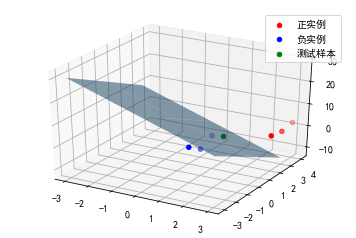

用时：0.125s


In [54]:
if __name__ == "__main__":
    main()